In [1]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 


In [2]:
try:
    df = pd.read_csv('./Training_Data/sclerochronology_training_1.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [3]:
df.head()

master_chronology1  61261
year                           
649             1.936838    NaN
650             1.605328    NaN
651             1.079118    NaN
652             0.424857    NaN
653            -0.415379    NaN

In [4]:
samples = []
i= 0
for col in df.columns:
    col_list = df[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples.append(cleanedList)
print(samples)
print(len(samples))
print(len(samples[1]))  


[[1.936838481, 1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.772309398, 1.556165602, 1.823282499, 1.0222408, 1.292814337, 1.034969212, 0.901032981, 1.13027091, 1.715414673, 0.993393389, 1.850822571, 2.442041392, 0.857572185, 0.700019051, 1.138055918, 1.250789931, -0.097870558, 0.453070437, -0.333305342, 0.504733741, 1.899954477, 0.051051639, 1.78828375, 0.86615834, 0.809999495, -0.178119801, 0.901369303, 0.716136721, 1.536897697, 1.731422168, 2.000601153, 2.620271926, 0.537737633, 0.400781936, 2.190152718, 0.103830399, 0.355241377, 0.983944721, 0.376496977, 1.662446171, 0.952252259, -0.322735529, 0.089002856, 1.467448995, 2.252157677, 1.659527541, 0.490924974, 0.762300621, 1.794865524, 2.537889544, 0.842956782, 2.057922679, -0.344389753, -0.48525862, -0.341097262, 0.274200499, 0.322065686, 3.368399598, -0.049570852, 0.373415028, 3.251336099, 1.365383313, 1.829605354, 2.157757686, -0.139121435, 1.218136579, -0.5443

# Testing the Heatmap criteria

In [6]:
testing = [samples[1], samples[1]]

In [45]:
test_segments = {}

size = 10
step = 1
length = len(testing)
for j in range(length):
    test_segments[j] = ([testing[j][i : i + size] for i in range(0, len(testing[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

test_short = []

for i in range(len(test_segments)):
    for j in range(len(test_segments[i])):
        if len(test_segments[i][j]) != 10:
            #print(segments[i][j])
            test_short.append(test_segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
test_segments0 = [x for x in test_segments[0] if x not in test_short]
test_segments1 = [x for x in test_segments[1] if x not in test_short]
    
#print(segments0)

test_segments[0] = test_segments0
test_segments[1] = test_segments1
test_segments[0][-1]
assert len(test_segments[0][-1]) == 10
assert len(test_segments[1][-1]) == 10
print(len(test_segments[0]))


59


In [51]:
test_master_segments = test_segments[0]
test_sample_segments = test_segments[1]
test_pairs =  [(x,y) for x in test_master_segments for y in test_sample_segments]
#print(pairs)

print(len(test_pairs))
print(test_pairs[0])

3481
([0.744327798, 0.737504805, 1.609655534, 1.669530251, 1.569741757, 0.482696117, -0.427576371, 2.817509901, 1.036183314, -0.00170256], [0.744327798, 0.737504805, 1.609655534, 1.669530251, 1.569741757, 0.482696117, -0.427576371, 2.817509901, 1.036183314, -0.00170256])


In [50]:
import scipy.stats
test_t_vals = {}
for i in range(len(test_pairs)):
    (test_seg1, test_seg2) = test_pairs[i]
    if len(test_seg1) == len(test_seg2) == 10:
        r = np.corrcoef(test_seg1, test_seg2)[1,0]
        n = min(len(test_seg1), len(test_seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        print(t)
        test_t_vals[str(i) + " " + str(t)] = (test_seg1, test_seg2)
    else: 
        print(test_seg1,test_seg2)
#print(t_vals)
print(len(test_t_vals))
#t_vals.keys()

189812531.2485031
-0.018747001500485628
-0.9642162349368039
-0.9181224581705762
0.15410731229010513
1.7233454011781857
-0.4679890316060644
-1.1660357324956552
-0.9773725438289332
1.3921047383840928
0.31140221975978916
-0.2586784608357179
-0.12617312715911932
0.5584760480631994
0.658288222702195
-0.9689785619819404
-0.6922924187367344
-0.2569072639119161
4.332004219722664
-0.803462305966138
-0.7577758750221981
0.5123055089136364
0.34084546473429167
0.7124134003448552
-0.17013040829942502
-0.7182994000005996
-1.3914661235302481
-0.5199940833165875
1.004827019066116
0.019707431798039878
-2.2479181282497778
1.448298765954253
0.6297879804647724
0.012004315031941824
0.13150405614588298
0.25146880417356215
-0.09603285337666286
-0.25176963520894086
0.33292712067111047
0.07066241194704995
-1.411891569496634
-0.004029592229823807
0.35492657847455894
0.3327107818901159
-0.46275540148919103
-0.42546346990966977
-1.0124532880531851
0.3427235577063071
3.873749767761314
-0.6132196263614543
-1.1803427

/var/folders/jn/d4dmng457v33gxcq0bh9n2nh0000gn/T/ipykernel_15331/678308890.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))


-0.6859266495584071
-0.22095146439307956
-0.8167219796334905
1.0620669749914808
1.3443313488559356
2.0271744406433156
0.6552617940746189
-1.4369594628762872
-2.5345799454596096
-0.010575658607971467
0.8793171045464564
0.5977461697631393
0.08074071642817848
-0.1018533959181248
-1.1971816556058879
-1.6344508082332634
-0.9339183398941824
0.31140221975978916
1.183974150831828
-0.8994185217518652
-0.5835339727705917
-0.6979465111164713
1.182794266054849
0.07694839625971402
-2.422425104792033
0.02381574014206156
0.4622817730544709
inf
-0.10649449713008875
-0.6396177831103647
-1.4768698062857593
0.5248975337454612
0.05288550499653223
-0.7038955820328634
0.49821218129056255
-0.3448402346903921
1.389341638431019
-1.2819414339135073
0.2933125988982623
0.11071530696546908
0.9506288110273706
-0.8969279133763788
-2.6898861008842
-0.3133418341770054
-0.26566925673935193
0.2223074939343034
0.6944069098129244
0.7878760037612861
-0.23367922619955314
2.3590935299814637
0.6499734316714794
0.3115943217561

-0.6096812005635064
-0.3564398365015611
-0.3430155964877933
-0.02197218899904619
-0.02466642665571012
-0.3835089396177579
0.2239852698194036
0.06583185457217978
inf
1.1956468674440763
0.27145772827419895
-0.5867157742817164
-0.4776002302845381
-1.0870166819681966
-1.264806491989553
-1.4072005055780787
-0.7505463374152789
-0.27956305013578614
1.6737206895832129
2.2718066174426843
-1.0510419282680519
1.0979062322998951
-0.06229316711493775
-0.7133768110445377
0.023010818814364665
1.028560412712625
0.8153089300284766
0.24565662676914307
-0.05428797707106567
-0.5683204398393804
-2.636673753847692
-1.5722321440098403
0.4632866595642084
1.6578356947285666
0.6280279104771509
0.45854370947124157
-1.6200433280449085
-1.658540660463898
1.197273732970241
0.4603462665334723
0.20479289014658655
3.941368301667983
-1.3914661235302481
-1.7259759644125336
-1.1496716717232047
0.9021839499006135
0.5703912067908199
0.7791037732098719
-0.042673390675074634
1.232034567423177
0.8886527004478395
-0.4457091732

0.5104788220501169
1.5572389266913689
-0.9908918284502927
0.08624410994587123
0.42523404905927237
-0.36293313752290035
-0.7355902009211589
-2.70941401218063
0.5284232524602905
0.6499734316714794
2.5609547753462834
-1.412596186843024
-0.06588635147572566
0.2312337761073633
-0.06820964602025374
0.19326486613905147
-0.8825574655250613
0.43148948565793077
-0.2996694252924657
1.41811298225047
-0.8350127477310295
1.765397155550883
1.5053584511362907
-0.07546241970998456
-0.7505463374152788
-1.0713555570470972
-0.9020710025877752
-1.5150829598067617
-0.2132309644399536
-0.3037321311195969
0.019758572939367867
-0.07379720097706749
inf
-0.19051147513968206
-0.021466031105564484
-0.14002898333822036
0.511734867381301
-1.471283298815553
1.0402105004836601
1.404334278336614
0.5497296784289947
-0.9325834994315535
-0.2991174309729834
-1.8354458777825216
-0.8470803383499835
-0.15733141356260594
1.126685978962808
0.6727960970103058
1.0131781581675263
-0.26477532447871716
-2.387019666324695
-0.10942678

0.22223455858118524
-2.295656313338486
-1.9659451131742902
-0.11593733551981883
1.4231701860383865
0.7508425484995919
0.7467881185053403
-0.18571019550026552
-1.190565200218191
-2.2322016817711603
-0.38656271205971543
1.0758289512798718
1.0752973116541176
0.5039890130543776
0.03855075392674228
-0.15171899570550995
0.3549265784745589
-0.5521374443076974
-2.563371981153399
-0.0026764264768125703
1.9500069310331285
1.8511880599100474
0.3741165581173198
-0.5222892140371479
-0.1723153471187826
-0.6859266495584071
-0.19851658814329837
-0.8312590080294975
1.1445624438019715
0.6525186508740735
-0.2164958913592674
-1.2934530724615734
0.15318199315359432
1.7112432581643924
-0.3122607516552711
-0.9583159013415585
-3.2305206892634892
-0.6905465193316163
0.0621258108686314
0.6230170423750718
0.566414696667129
1.028560412712625
1.9791446903054486
2.046131296010371
0.92630827245315
-0.6852820482602712
-1.0892474236991019
-1.718602459339019
-0.3836963032325467
-0.9325834994315535
0.2050121668525035
0.

0.9720138749552169
0.5302795800405127
-2.645482108731891
-0.6132196263614543
1.6378973532154883
-0.031381988588119886
-0.28617169671693127
-0.20850685627897347
0.8348626837675396
1.6973655336516782
-0.22706168882554445
-2.5983556298436863
-1.4369594628762872
0.30537210390301334
1.03737641705088
-0.019628786114655305
0.060620779057471444
0.3530709818686822
-0.0829294587469122
0.40517252097848844
-0.7666715530653742
-0.27455564683233397
0.8684175233126027
-0.8393424189572123
-1.4609003636553344
0.6786215780190259
0.8111175232465725
1.9130097462376319
0.46328665956420834
0.4656404037958545
0.1802858795347567
-1.1145711273288732
0.5176701829792122
-1.071885099274605
-3.0971328354509824
-0.20416761549323212
1.0131781581675263
0.2350564788444481
0.8404860015881976
0.1723126339626688
0.852048539118127
-1.5998403949823248
-0.2182050185214512
0.06923220917640387
0.7467881185053404
0.9553179998876323
1.379629903083612
-0.3432492764314491
-1.561171799457511
-1.2757748116946088
-0.8938954555761219

-1.7114216520101337
0.5302795800405127
0.8138006762577596
1.045633719432195
1.8759626850424418
-1.566617272904159
-1.6437446528103883
0.9219801628243193
-0.7606484555086594
0.12585165158797204
inf
-0.17340769535776834
-1.769940112344547
0.07038582237182989
0.0647664229036996
0.9332825282944126
0.28840499644627293
-0.7131310904836026
-0.056622545329540586
2.7536910792915408
0.2865737742669966
-0.9339183398941824
-1.5590140223686644
-1.18817135954946
0.9902336317363203
0.08656208174500733
0.5696518958193333
-0.724844650385529
1.7760828398629915
-0.9092618208599447
-1.020887789942546
0.4543640455394726
-0.260081740191958
-0.3104558629429589
-0.2505843405064768
-0.8481303252648934
0.056022892712703
3.941368301667983
1.6221088024340933
0.6169334133542173
-0.7745048032396387
0.6319612806725265
-0.2872285496522738
-1.5552442595164244
-0.6493860294303246
-0.9367048403934047
-0.992681902241054
1.2961641600661613
1.0276156507781744
-0.7361826128742384
0.4608360616907346
0.5307490458575082
-0.507

In [48]:
test_values = list(test_t_vals.keys())
for i in range(len(test_values)):
    test_values[i] = float(test_values[i].split()[-1])
    
print(test_values)

print(len(test_values)/59)
n = 10
endlist = [[] for _ in range(n)]
for index, item in enumerate(test_values):
    endlist[index % n].append(item)
#print(endlist)

test_strides = [0]
length = int(len(test_values)//59)
for i in range(length):
    test_strides.append(59+i)
    i+=1

chronology = []
t_values_samples = []

for i in range(59):
    for j in range(len(test_strides)):
        chronology.append(test_values[test_strides[j]])
        j+=1
    test_strides = [x+1 for x in test_strides]
    t_values_samples.append(chronology)
    chronology = []
    i+=1
result = []
for i in range(len(t_values_samples)):
    result.append(sum(abs(float(number)) for number in t_values_samples[i]))
max_list = (max(result, key=abs))

print(result.index(max_list))

max_val = (max(t_values_samples[25], key=abs))
print(max_list)
print(max_val)
#print(t_values_samples)
#print(len(t_values_samples))
std = np.std(test_values)
mean = np.mean(test_values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(test_values)):
    if test_values[x] >= out_up or test_values[x] <= out_down: 
        outlying.append(test_values[x])
#print(outlying)


[189812531.2485031, -0.018747001500485628, -0.9642162349368039, -0.9181224581705762, 0.15410731229010513, 1.7233454011781857, -0.4679890316060644, -1.1660357324956552, -0.9773725438289332, 1.3921047383840928, 0.31140221975978916, -0.2586784608357179, -0.12617312715911932, 0.5584760480631994, 0.658288222702195, -0.9689785619819404, -0.6922924187367344, -0.2569072639119161, 4.332004219722664, -0.803462305966138, -0.7577758750221981, 0.5123055089136364, 0.34084546473429167, 0.7124134003448552, -0.17013040829942502, -0.7182994000005996, -1.3914661235302481, -0.5199940833165875, 1.004827019066116, 0.019707431798039878, -2.2479181282497778, 1.448298765954253, 0.6297879804647724, 0.012004315031941824, 0.13150405614588298, 0.25146880417356215, -0.09603285337666286, -0.25176963520894086, 0.33292712067111047, 0.07066241194704995, -1.411891569496634, -0.004029592229823807, 0.35492657847455894, 0.3327107818901159, -0.46275540148919103, -0.42546346990966977, -1.0124532880531851, 0.3427235577063071,

In [38]:
print(len(test_t_vals.keys()) / 59)
test_heatmap =np.array(np.split(np.array(test_values), 59, axis=0))
test_heatmap.shape

59.0


(59, 59)

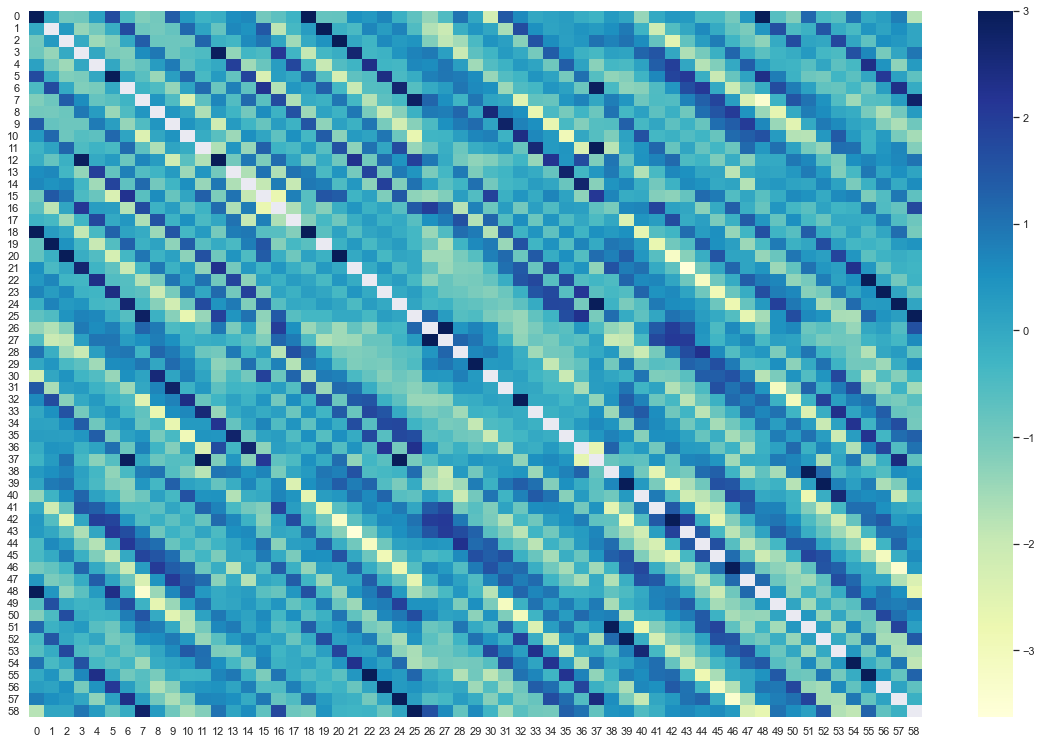

In [61]:
sns.set(rc={'figure.figsize':(20,13)})
sns.heatmap(test_heatmap, cmap="YlGnBu", vmax= 3)
plt.show()

# Small Segment Statistical Method

In [62]:
#Helper method: Splitting an array into even sized chunks with a given overlap. (Using lists of lists and dictionaries.)

segments = {}

size = 10
step = 1
length = len(samples)
for j in range(length):
    segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != 10:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == 10
assert len(segments[1][-1]) == 10

In [63]:
#Get every combination of the sample segment with the first master segement then moves onto the next one and so on
master_segments = segments[0]
sample_segments = segments[1]
pairs =  [(x,y) for x in master_segments for y in sample_segments]
#print(pairs)

print(len(pairs))
pairs.index(([1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.772309398],[0.744327798, 0.737504805, 1.609655534, 1.669530251, 1.569741757, 0.482696117, -0.427576371, 2.817509901, 1.036183314, -0.00170256]))
len(pairs) /59

79532


1348.0

In [67]:
import scipy.stats
t_vals = {}
for i in range(len(pairs)):
    (seg1, seg2) = pairs[i]
    if len(seg1) == len(seg2) == 10:
        r = np.corrcoef(seg1, seg2)[1,0]
        n = min(len(seg1), len(seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        t_vals[str(i) + " " + str(t)] = (seg1,seg2)
    else: 
        print(seg1,seg2)
#print(t_vals)
print(len(t_vals))
#t_vals.keys()

79532


In [117]:
values = list(t_vals.keys())
for i in range(len(values)):
    values[i] = float(values[i].split()[-1])
print(len(values)/1348)
n = 10
endlist = [[] for _ in range(n)]
for index, item in enumerate(values):
    endlist[index % n].append(item)
#print(endlist)

strides = [0]
length = int(len(values)//1348)
for i in range(length):
    strides.append(59+i)
    i+=1

chronology = []
t_values_samples = []

for i in range(1348):
    for j in range(len(strides)):
        chronology.append(values[strides[j]])
        j+=1
    strides = [x+1 for x in strides]
    t_values_samples.append(chronology)
    chronology = []
    i+=1
result = []
for i in range(len(t_values_samples)):
    result.append(sum(abs(number) for number in t_values_samples[i]))
max_list = (max(result, key=abs))

print(result.index(max_list))

max_val = (max(t_values_samples[25], key=abs))
print(max_list)
print(max_val)
#print(t_values_samples)
#print(len(t_values_samples))
std = np.std(values)
mean = np.mean(values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(values)):
    if values[x] >= out_up or values[x] <= out_down: 
        outlying.append(values[x])
stri = 60
x=list(map(str,outlying))
z="-".join(x)
contender = []
for y in range(len(outlying)):
    ind = values.index(outlying[y])
    if z.find(str(values[ind + stri])) != -1:
        if z.find(str(values[ind + stri + stri])) != -1:
                if z.find(str(values[ind + stri + stri + stri])) != -1:
                    if z.find(str(values[ind + stri + stri + stri + stri])) != -1:
                        if z.find(str(values[ind + stri + stri + stri + stri + stri])) != -1:
                            if z.find(str(values[ind + stri + stri + stri + stri + stri + stri])) != -1:
                                contender.append(outlying[y])
                                y+=1
                            else:
                                y+=1
                        else:
                            y+=1
                            
                    else:
                        y+=1
                else:
                    y+=1
        else: 
            y+=1
    else:
        y+=1
print(len(outlying))  
print(len(contender))
print(contender)
    
    
#print(outlying)

#Find the length of the list of pairs for the sample list
#Make sure all the lists of length less than 10 are deleted 
#Collect the t values with a loop using a gap of the list length + 1 and then adding one
#Find the highest 3 lists with the most consistant high t values
#Check these t values are actually statisically signinficant
#Add the padding and place the chronologies into the dataframe



max_outlying = (max(values, key=abs))
print(values.index(max_outlying))
max_outlying = str(str(values.index(max_outlying)) + ' ' + str(max_outlying))
print(max_outlying)
max_contender = (max(contender, key=abs))
max_contender = str(str(values.index(max_contender)) + ' ' + str(max_contender))
print(max_contender)

59.0
362
67.99627866740582
3.4920578829034223
669
17
[4.59522711909315, -4.102186431225983, 4.146900977754183, 4.394891759628399, 4.315612345464977, 4.919987230957291, 4.8641126842205304, 5.062043517535245, 3.7561792480714664, 3.939688052206172, 5.551706172160355, 5.521447844992889, 8.243483452674838, 7.426743985191521, 7.576400684014132, 6.974683379753293, 6.641108838787614]
48230
48230 12.774032858791308
78695 8.243483452674838


In [109]:
print(len(t_vals.keys()) / 1348)
heatmap =np.array(np.split(np.array(values), 1348, axis=0))
heatmap.shape

59.0


(1348, 59)

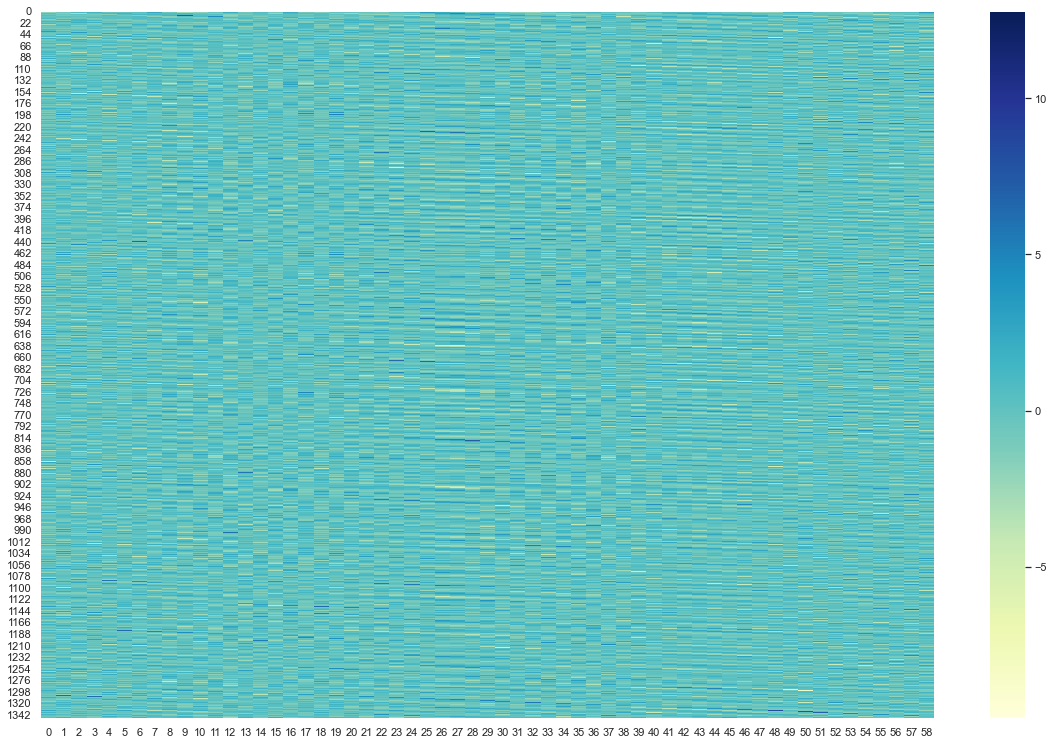

In [95]:
sns.set(rc={'figure.figsize':(20,13)})
sns.heatmap(heatmap, cmap="YlGnBu")
plt.show()

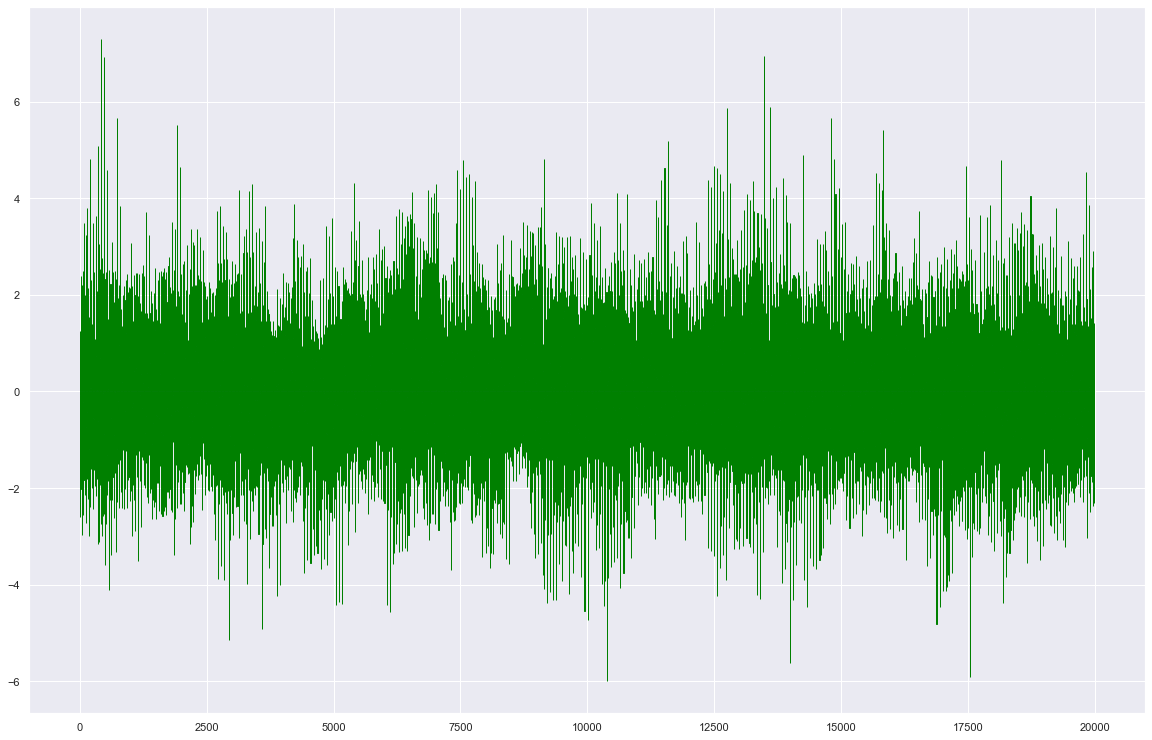

In [72]:
cols = ['red' if x < 68 else 'green' if 68 <= x < 136 else 'blue' if 136 <= x < 204 else 'yellow' if 204 <= x < 272 else 'red' if 272 <= x <340 else '']
sns.set(rc={'figure.figsize':(20,13)})
plt.bar( list(range(len(values[:20000]))), values[:20000],  edgecolor='green')
plt.show()

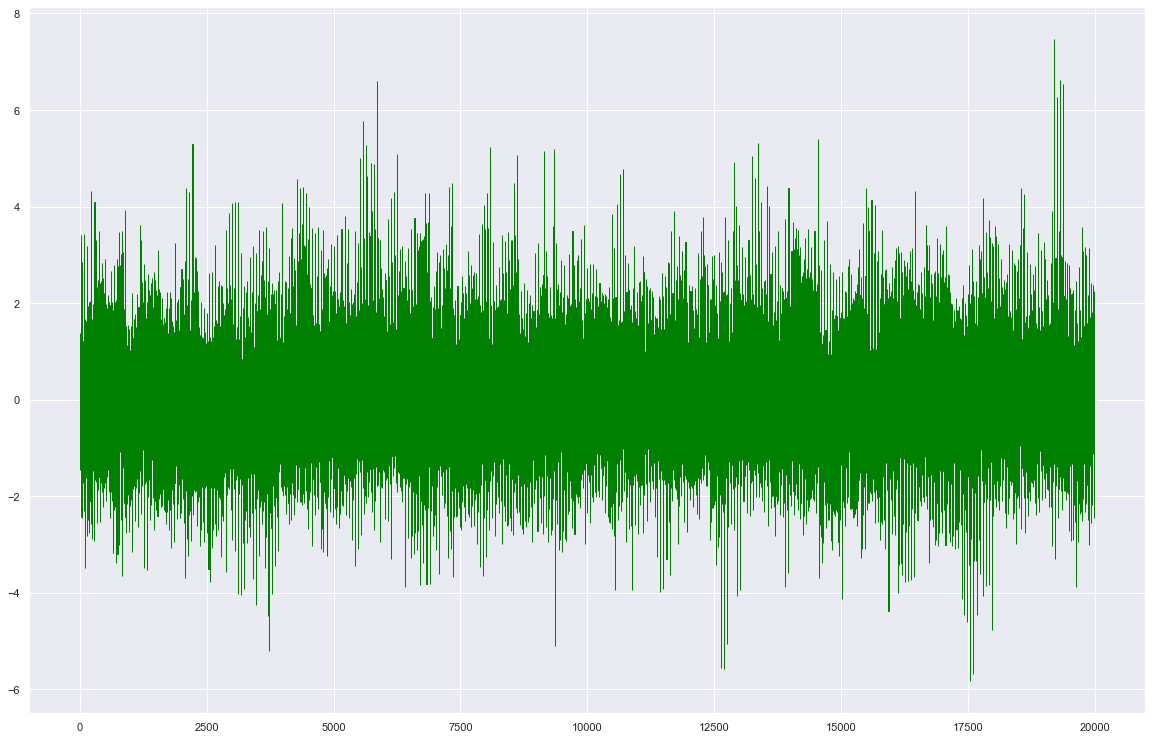

In [73]:
cols = ['red' if x < 68 else 'green' if 68 <= x < 136 else 'blue' if 136 <= x < 204 else 'yellow' if 204 <= x < 272 else 'red' if 272 <= x <340 else '']
sns.set(rc={'figure.figsize':(20,13)})
plt.bar( list(range(len(values[20000:40000]))), values[20000:40000],  edgecolor='green')
plt.show()

In [111]:
(master_seg, sample_seg) = t_vals[max_contender]
print(master_seg, sample_seg)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg[0]))
print(samples[0].index(master_seg[1]))
print(samples[1].index(sample_seg[0]))
print(samples[1].index(sample_seg[1]))


[0.372973326, 0.806538715, 2.766661367, 2.254032845, 1.282305812, 0.104664617, 0.166462045, 1.394677935, 1.20175918, 0.810010639] [0.22205842, 1.1343874, 2.65165416, 2.102608314, 1.848289882, 0.08558881, -0.03258415, 2.007527569, 1.360927475, 0.736088919]
1333
1334
48
49


In [112]:
samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0])


1285

In [123]:
#Fix the padding issues (Think i may have cracked it)
#Need a way not to hard code the column names in 
indices = np.where(df["master_chronology1"] == master_seg[0])
indices2 = np.where(df["61261"] == samples[0][0])
print(indices)
print(indices2)
print(samples[1].index(sample_seg[0]))
start = indices[0]-samples[1].index(sample_seg[0])
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
    
#if len(chronology) > (ending-beginning):
   # print("Length", (ending-beginning))
    #deletion = int(len(chronology)-(ending-beginning))
   # print("Deletion", deletion)
    #for x in range(deletion-1):
      #  chronology.pop()
       # x+=1
print(chronology)

df['Algined']= chronology


(array([1333]),)
(array([], dtype=int64),)
48
start [1285]
Legth 68
Beginning 649
Ending 2005
Padding 1285
634
4
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None

<AxesSubplot:xlabel='year'>

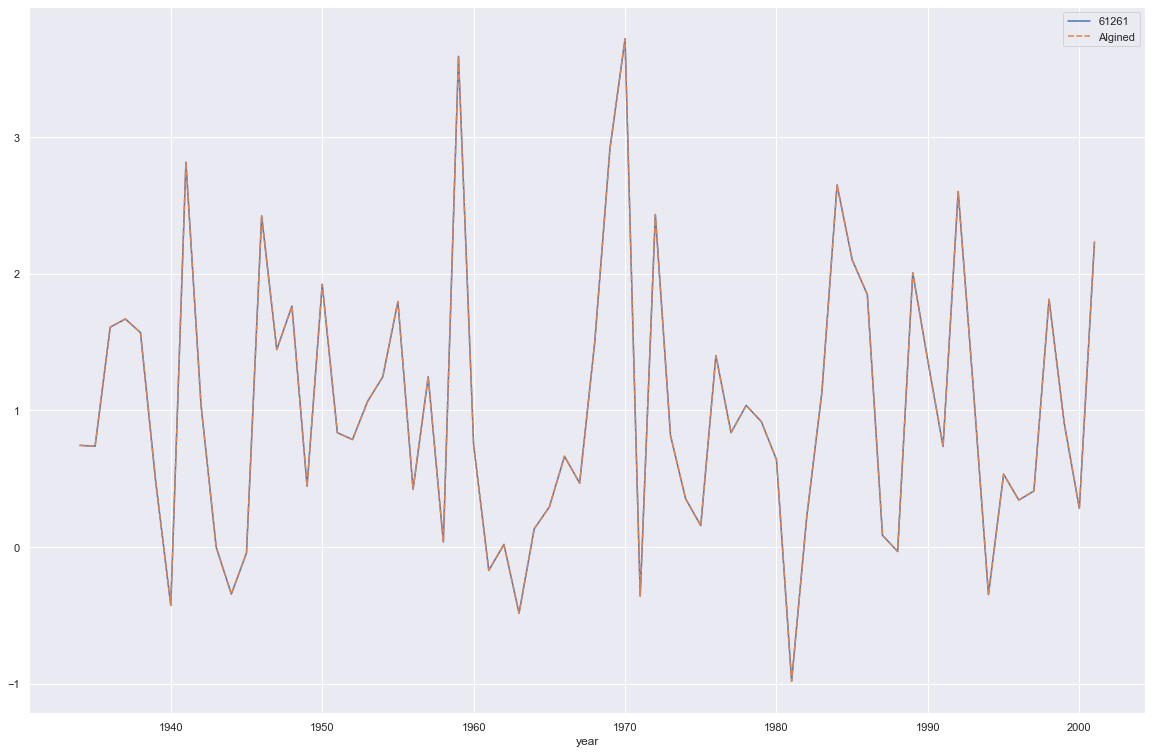

In [124]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["61261",'Algined']])

<AxesSubplot:xlabel='year'>

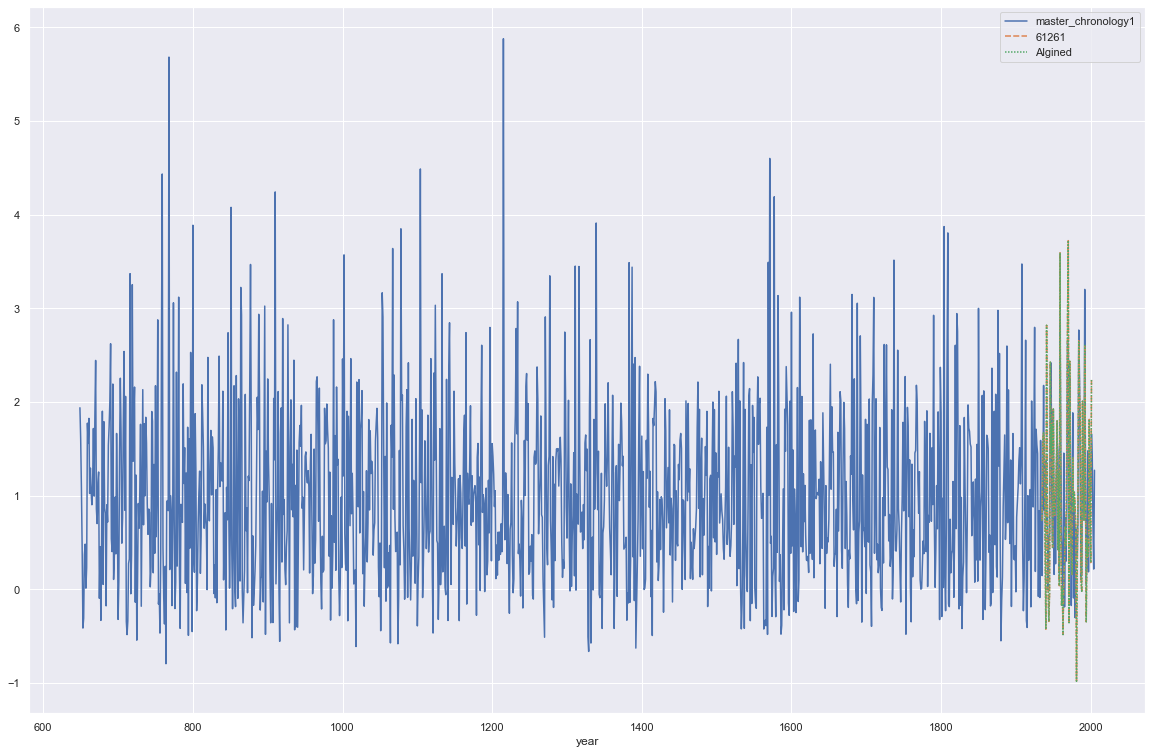

In [125]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["master_chronology1","61261",'Algined']])

# Large Sections Statistical method

In [84]:
large_segments = {}

size = len(samples[1])
step = 1
length = len(samples)
for j in range(length):
    large_segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1
print(large_segments[0])
print(large_segments[1])

for i in range(len(large_segments)):
    for j in range(len(large_segments[i][j])):
        if len(large_segments[i][j]) != size:
            print(large_segments[i][j])
            large_segments[i][j].delete()
            j+=1
    i+=1

[[1.936838481, 1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.772309398, 1.556165602, 1.823282499, 1.0222408, 1.292814337, 1.034969212, 0.901032981, 1.13027091, 1.715414673, 0.993393389, 1.850822571, 2.442041392, 0.857572185, 0.700019051, 1.138055918, 1.250789931, -0.097870558, 0.453070437, -0.333305342, 0.504733741, 1.899954477, 0.051051639, 1.78828375, 0.86615834, 0.809999495, -0.178119801, 0.901369303, 0.716136721, 1.536897697, 1.731422168, 2.000601153, 2.620271926, 0.537737633, 0.400781936, 2.190152718, 0.103830399, 0.355241377, 0.983944721, 0.376496977, 1.662446171, 0.952252259, -0.322735529, 0.089002856, 1.467448995, 2.252157677, 1.659527541, 0.490924974, 0.762300621, 1.794865524, 2.537889544, 0.842956782, 2.057922679, -0.344389753, -0.48525862, -0.341097262, 0.274200499, 0.322065686, 3.368399598], [1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.23085

In [85]:
master_segments1 = large_segments[0]
sample_segments1 = large_segments[1]
large_pairs =  [(x,y) for x in master_segments1 for y in sample_segments1]
print(large_pairs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [86]:
import scipy.stats
large_t_vals = {}
for i in range(len(large_pairs)):
    (seg1, seg2) = large_pairs[i]
    if len(seg1) == len(seg2) == len(samples[1]):
        r = scipy.stats.pearsonr(seg1, seg2)[0]
        n = min(len(seg1), len(seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        large_t_vals[t] = (seg1,seg2)
print(large_t_vals)
large_t_vals.keys()

{0.42380867055082966: ([1.936838481, 1.605328427, 1.079118093, 0.424857487, -0.415379142, -0.31108195, 0.369677032, 0.48068699, 0.010854986, 0.230856345, 1.772309398, 1.556165602, 1.823282499, 1.0222408, 1.292814337, 1.034969212, 0.901032981, 1.13027091, 1.715414673, 0.993393389, 1.850822571, 2.442041392, 0.857572185, 0.700019051, 1.138055918, 1.250789931, -0.097870558, 0.453070437, -0.333305342, 0.504733741, 1.899954477, 0.051051639, 1.78828375, 0.86615834, 0.809999495, -0.178119801, 0.901369303, 0.716136721, 1.536897697, 1.731422168, 2.000601153, 2.620271926, 0.537737633, 0.400781936, 2.190152718, 0.103830399, 0.355241377, 0.983944721, 0.376496977, 1.662446171, 0.952252259, -0.322735529, 0.089002856, 1.467448995, 2.252157677, 1.659527541, 0.490924974, 0.762300621, 1.794865524, 2.537889544, 0.842956782, 2.057922679, -0.344389753, -0.48525862, -0.341097262, 0.274200499, 0.322065686, 3.368399598], [0.744327798, 0.737504805, 1.609655534, 1.669530251, 1.569741757, 0.482696117, -0.42757637

dict_keys([0.42380867055082966, -1.979687638821567, 0.3052169194325047, 2.1004323576761634, 0.9488522439607181, 1.2561244376509786, 0.19319444629360935, -1.4243067303046342, 0.3897878331741815, 0.9723971959927368, -2.6318692203039045, -0.6028219953184268, -1.8560413030067595, -1.3641705067131935, -0.2034940441573058, 0.43987088369182775, 1.0148908310967353, 1.2289424411806609, 0.615475383659886, 0.83960004075141, 0.3463125822491446, 0.0026911748304178328, 0.6997994105737653, 1.1149385868907455, -0.970249217870989, 0.41754807406248007, -1.83907269735676, -1.9144248739012528, -0.4242067845115913, 0.8070696910998312, -1.7195174999665577, -0.1861045985777593, 0.5441518206382432, 0.20822064497548276, 2.0910798618255106, 0.9961191264334921, 1.034429374098034, 1.718166087229205, -0.7877884790632381, -1.1021205376459735, -1.0366589913600455, -1.2019721922661866, 0.8693203471414699, -1.5193524374387806, -2.3077485087145386, 1.7276161684790863, 1.9169937482116826, 0.6234961660689243, -0.60501457

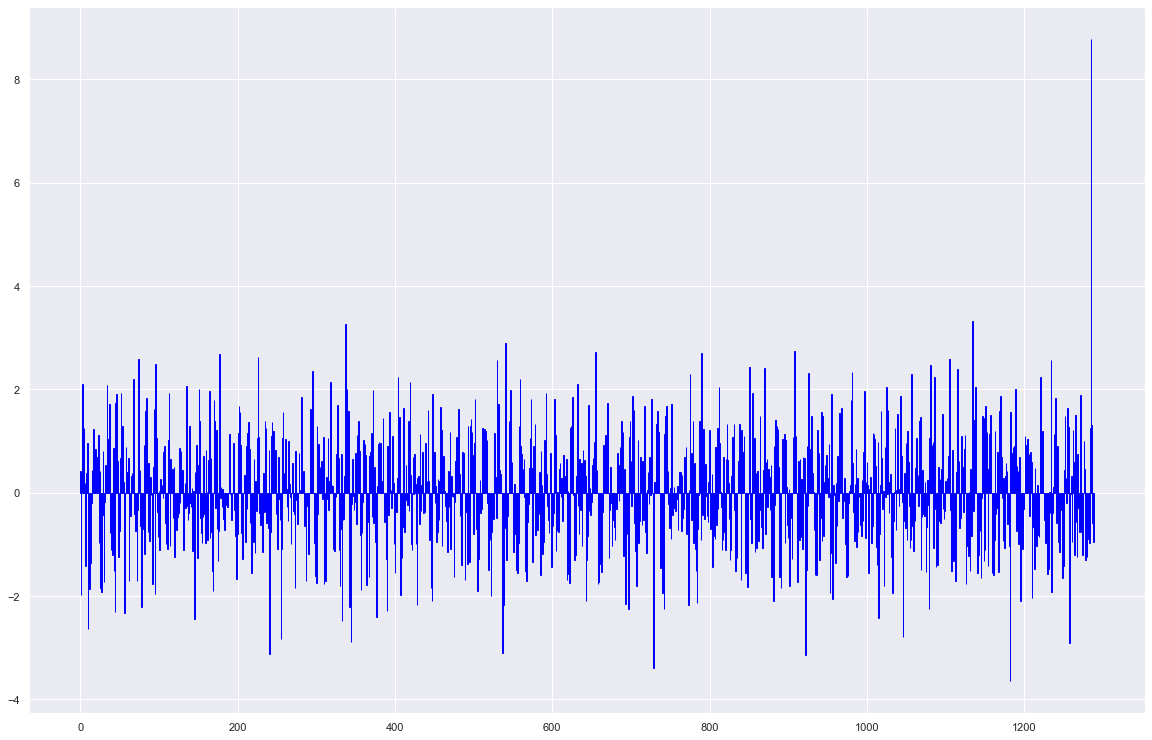

In [87]:
large_values = list(large_t_vals.keys())
sns.set(rc={'figure.figsize':(20,13)})
plt.bar( list(range(len(large_values))), large_values, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.show()

In [88]:
n = len(samples[1])
endlist = [[] for _ in range(n)]
for index, item in enumerate(large_values):
    endlist[index % n].append(item)
print(endlist)

large_std = np.std(large_values)
large_mean = np.mean(large_values)
print(large_mean)
large_out_up = large_mean+3*large_std
print(large_out_up)
large_out_down = large_mean-3*large_std
print(large_out_down)
large_outlying = []
for x in range(len(large_values)):
    if large_values[x] >= large_out_up or large_values[x] <= large_out_down: 
        large_outlying.append(values[x])
print(large_outlying)

#Find the length of the list of pairs for the sample list
#Make sure all the lists of length less than 10 are deleted 
#Collect the t values with a loop using a gap of the list length + 1 and then adding one
#Find the highest 3 lists with the most consistant high t values
#Check these t values are actually statisically signinficant
#Add the padding and place the chronologies into the dataframe



large_max_outlying = (max(large_values, key=abs))
print(large_max_outlying)

[[0.42380867055082966, 2.1974965966990125, -0.2617833123623519, 0.9268556334639766, -0.4097525243534384, 0.9750924967845565, -1.6150357476808115, -0.1854853834629901, -0.03656921706157508, 0.277434473440382, -0.9083610771186025, -0.2238922487701837, -1.0985207510631434, 1.416085192980986, 0.9508964683752954, -0.3188957483986546, -1.4439482690251788, 1.1418993337882357, 0.8194387110389956], [-1.979687638821567, -0.40344402125022044, -0.5174056843254147, -0.7842601329225424, -1.8511616218703926, 1.580581955926203, -1.268861931343185, 0.6225202175092338, 1.386597025815279, -0.5421208101805416, -0.16372110101909035, -0.675932710852785, -0.9074271033701992, 0.1950723530858308, -1.940466568024155, 0.025334553741516018, -1.0003992815309632, 1.5115854047972173, -0.08910571345081977], [0.3052169194325047, -0.7428659655670153, -0.39464259300761007, -1.2817354777906922, 0.8153408067520523, -2.2045385375114654, -0.6651465129149595, 1.0759666729806512, 0.8779019937835878, 0.7401484447678506, -0.321

In [89]:
(master_seg1, sample_seg1) = large_t_vals[large_max_outlying]
print(master_seg1, sample_seg1)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg1[0]))
print(samples[0].index(master_seg1[1]))
print(samples[1].index(sample_seg1[0]))
print(samples[1].index(sample_seg1[1]))


[0.276655719, 0.145112558, 1.046589149, 2.174904848, 0.842435048, 1.258658818, 1.368880999, 0.69863438, 0.830886393, -0.00820425, 0.534273942, 0.597156932, 2.161667766, 2.415307112, 0.969133699, 0.501145021, 1.914125507, 0.157856264, 0.994870381, 0.27149899, 1.226489039, 1.597437024, 1.475668069, 0.509919073, 0.17176143, 2.878813758, 1.53605392, 0.58913451, 0.282591306, -0.177122377, 1.452272042, -0.189524253, 0.762222409, 0.299306232, 0.855830851, 2.643632999, 2.528113969, 0.534313446, 2.25967243, 1.26976055, -0.174321338, 0.7574617, 1.88252025, -0.093678678, 0.900529967, -0.303256613, 0.642253076, 0.361474848, 0.372973326, 0.806538715, 2.766661367, 2.254032845, 1.282305812, 0.104664617, 0.166462045, 1.394677935, 1.20175918, 0.810010639, 3.20048871, 1.00000635, 0.051581377, 0.389166981, 1.475974643, 0.185010428, 1.322578743, 0.971332156, 1.034463934, 1.657925393] [0.744327798, 0.737504805, 1.609655534, 1.669530251, 1.569741757, 0.482696117, -0.427576371, 2.817509901, 1.036183314, -0.0

In [90]:
samples[0].index(master_seg1[0]) - samples[1].index(sample_seg1[0])


1285

In [91]:
#Fix the padding issues (Think i may have cracked it)
#Need a way not to hard code the column names in 
indices = np.where(df["master_chronology1"] == master_seg1[0])
indices2 = np.where(df["61261"] == samples[0][0])
print(indices)
print(indices2)
print(samples[1].index(sample_seg1[0]))
start = indices[0]-samples[1].index(sample_seg1[0])
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
    
#if len(chronology) > (ending-beginning):
   # print("Length", (ending-beginning))
    #deletion = int(len(chronology)-(ending-beginning))
   # print("Deletion", deletion)
    #for x in range(deletion-1):
      #  chronology.pop()
       # x+=1
print(chronology)

df['Large_Algined']= chronology


(array([1285]),)
(array([], dtype=int64),)
0
start [1285]
Legth 68
Beginning 649
Ending 2005
Padding 1285
634
4
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,

<AxesSubplot:xlabel='year'>

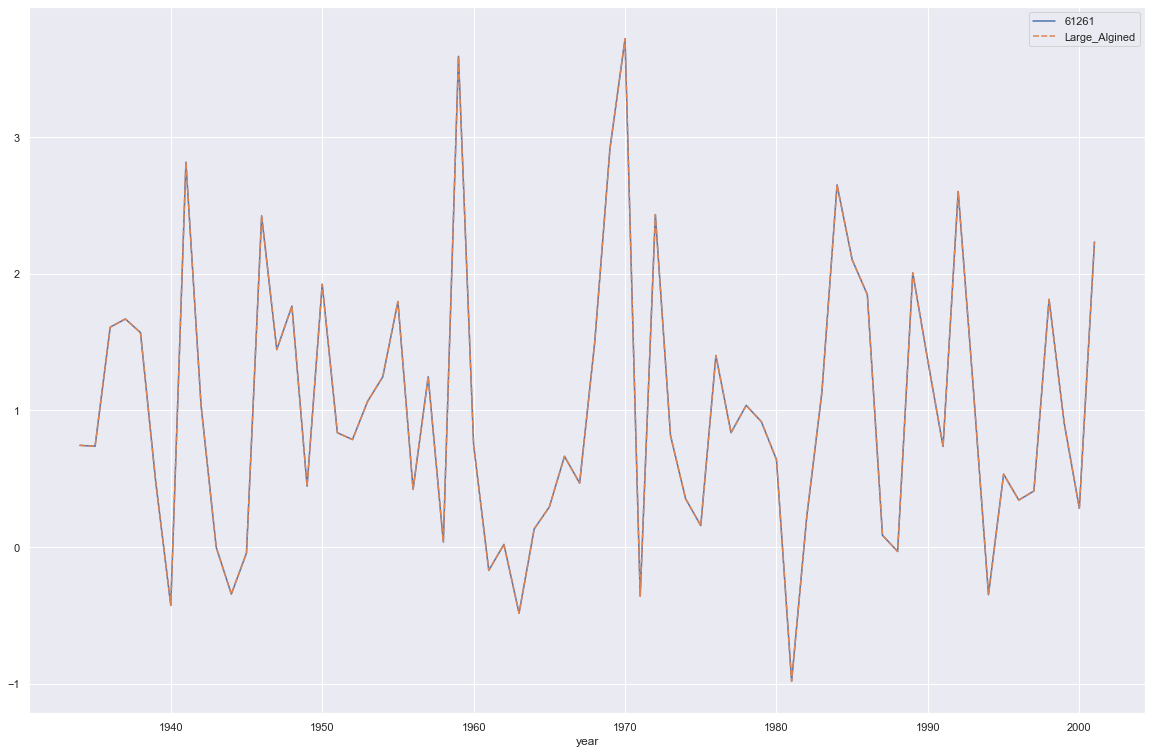

In [92]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["61261",'Large_Algined']])

<AxesSubplot:xlabel='year'>

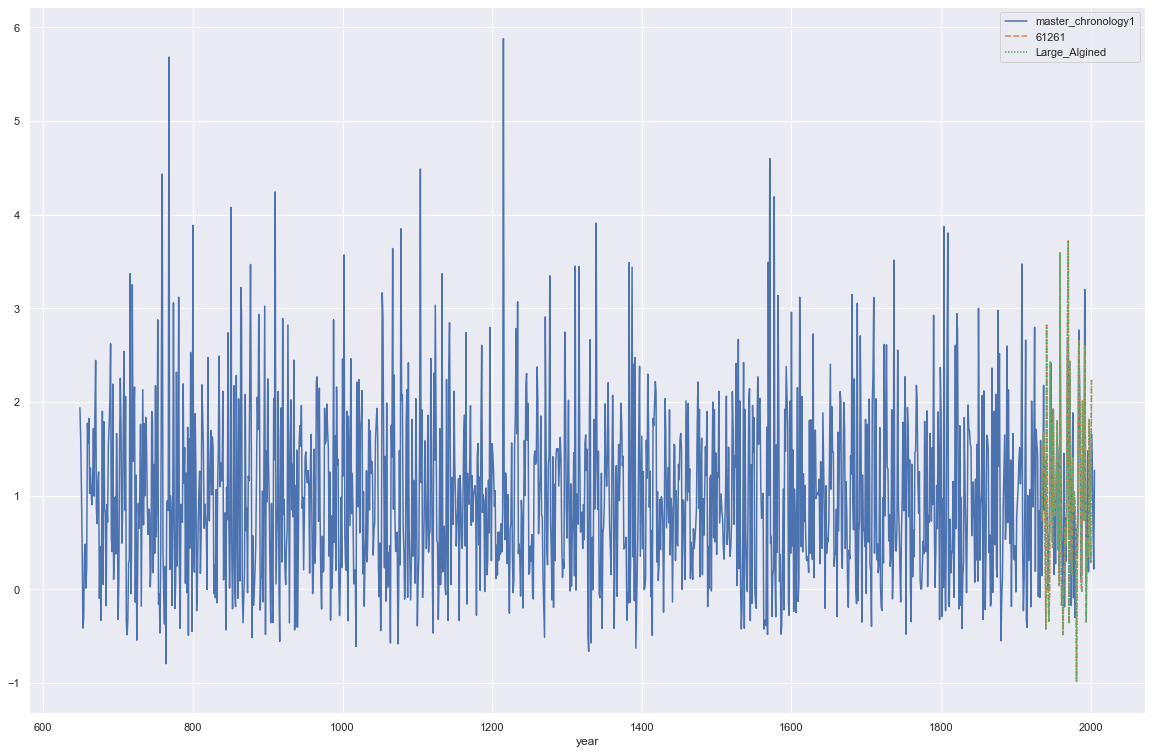

In [93]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["master_chronology1","61261",'Large_Algined']])